## 讀取資料

In [1]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/USD')

In [7]:
df = dfs[0]

In [8]:
df.head()

掛牌日期                幣別    現金匯率         Unnamed: 5_level_0  \
         掛牌日期      本行買入      幣別    本行賣出    本行買入               本行賣出   
0  2019/07/19  美金 (USD)  30.650  31.320  31.000             31.100   
1  2019/07/18  美金 (USD)  30.665  31.335  31.015             31.115   
2  2019/07/17  美金 (USD)  30.670  31.340  31.020             31.120   
3  2019/07/16  美金 (USD)  30.630  31.300  30.980             31.080   
4  2019/07/15  美金 (USD)  30.640  31.310  30.990             31.090   

                即期匯率                    Unnamed: 8_level_0  
  Unnamed: 6_level_1 Unnamed: 7_level_1 Unnamed: 8_level_1  
0                NaN                NaN                NaN  
1                NaN                NaN                NaN  
2                NaN                NaN                NaN  
3                NaN                NaN                NaN  
4                NaN                NaN                NaN

## 清理資料

In [9]:
df = df.iloc[:,0:6]

In [10]:
df.head()

掛牌日期                幣別    現金匯率         Unnamed: 5_level_0
         掛牌日期      本行買入      幣別    本行賣出    本行買入               本行賣出
0  2019/07/19  美金 (USD)  30.650  31.320  31.000             31.100
1  2019/07/18  美金 (USD)  30.665  31.335  31.015             31.115
2  2019/07/17  美金 (USD)  30.670  31.340  31.020             31.120
3  2019/07/16  美金 (USD)  30.630  31.300  30.980             31.080
4  2019/07/15  美金 (USD)  30.640  31.310  30.990             31.090

In [11]:
df.columns = ['掛牌日期', '幣別', '現金匯率-本行買入', '現金匯率-本行賣出', '即期匯率-本行買入','即期匯率-本行賣出']

In [12]:
df.head()

,掛牌日期,幣別,現金匯率-本行買入,現金匯率-本行賣出,即期匯率-本行買入,即期匯率-本行賣出
0,2019/07/19,美金 (USD),30.650,31.320,31.000,31.100
1,2019/07/18,美金 (USD),30.665,31.335,31.015,31.115
2,2019/07/17,美金 (USD),30.670,31.340,31.020,31.120
3,2019/07/16,美金 (USD),30.630,31.300,30.980,31.080
4,2019/07/15,美金 (USD),30.640,31.310,30.990,31.090


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
掛牌日期         120 non-null object
幣別           120 non-null object
現金匯率-本行買入    120 non-null float64
現金匯率-本行賣出    120 non-null float64
即期匯率-本行買入    120 non-null float64
即期匯率-本行賣出    120 non-null float64
dtypes: float64(4), object(2)
memory usage: 5.7+ KB


In [14]:
df['掛牌日期'] = pandas.to_datetime(df['掛牌日期'], format= '%Y/%m/%d')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
掛牌日期         120 non-null datetime64[ns]
幣別           120 non-null object
現金匯率-本行買入    120 non-null float64
現金匯率-本行賣出    120 non-null float64
即期匯率-本行買入    120 non-null float64
即期匯率-本行賣出    120 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.7+ KB


In [16]:
df.head()

,掛牌日期,幣別,現金匯率-本行買入,現金匯率-本行賣出,即期匯率-本行買入,即期匯率-本行賣出
0,2019-07-19,美金 (USD),30.650,31.320,31.000,31.100
1,2019-07-18,美金 (USD),30.665,31.335,31.015,31.115
2,2019-07-17,美金 (USD),30.670,31.340,31.020,31.120
3,2019-07-16,美金 (USD),30.630,31.300,30.980,31.080
4,2019-07-15,美金 (USD),30.640,31.310,30.990,31.090


## 儲存資料

In [17]:
df.to_excel('rate.xlsx')

In [18]:
df.to_csv('rate.csv')

In [20]:
import sqlite3
with sqlite3.connect('rate.sqlite') as db:
    df.to_sql('rate', con = db , if_exists='replace')

In [22]:
import sqlite3
with sqlite3.connect('rate.sqlite') as db:
    df2 = pandas.read_sql_query('select avg("現金匯率-本行買入") from rate', con = db )
df2

,"avg(""現金匯率-本行買入"")"
0,30.602917


## 資料分析

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
掛牌日期         120 non-null datetime64[ns]
幣別           120 non-null object
現金匯率-本行買入    120 non-null float64
現金匯率-本行賣出    120 non-null float64
即期匯率-本行買入    120 non-null float64
即期匯率-本行賣出    120 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.7+ KB


In [25]:
df.describe()

,現金匯率-本行買入,現金匯率-本行賣出,即期匯率-本行買入,即期匯率-本行賣出
count,120.000000,120.000000,120.000000,120.000000
mean,30.602917,31.287583,30.967583,31.067583
std,0.250362,0.246357,0.246357,0.246357
min,30.315000,31.005000,30.685000,30.785000
25%,30.413750,31.103750,30.783750,30.883750
50%,30.475000,31.165000,30.845000,30.945000
75%,30.707500,31.386250,31.066250,31.166250
max,31.180000,31.870000,31.550000,31.650000


## 資料視覺化

In [45]:
df = df.sort_values('掛牌日期')

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


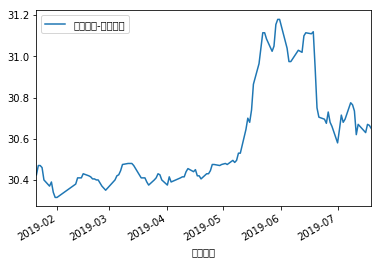

In [47]:
%pylab inline
df.plot(x = '掛牌日期', y = '現金匯率-本行買入',kind = 'line')

In [49]:
%pylab inline
df['ma30'] = df['現金匯率-本行買入'].rolling(window = 30).mean()
df.set_index('掛牌日期',inplace=True)


Populating the interactive namespace from numpy and matplotlib


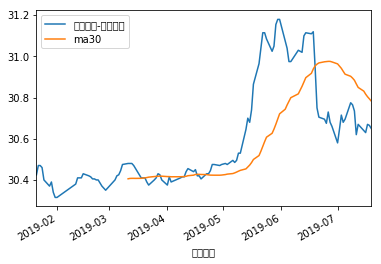

In [50]:
df[['現金匯率-本行買入','ma30']].plot(kind = 'line')

## 機器學習

In [30]:
import pandas
customer = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/digiplus_ds/master/data/customer_churn.csv', index_col=0)

In [31]:
customer.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [32]:
customer = customer.iloc[:,3:]

In [33]:
customer.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [34]:
customer.isna().sum()

international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [36]:
customer.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [37]:
customer['international_plan'] = customer['international_plan'].replace({'yes':1,'no':0})

In [38]:
customer['voice_mail_plan'] = customer['voice_mail_plan'].replace({'yes':1,'no':0})

In [39]:
customer['churn'] = customer['churn'].replace({'yes':1,'no':0})

In [40]:
customer.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
X = customer.iloc[:,:-1]
Y = customer.iloc[:,-1]
clf = GradientBoostingClassifier()
clf.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [42]:
predicted = clf.predict(X)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,predicted )

0.9711971197119712